# Detecting Trends

In [16]:
import sqlite3
import pandas as pd
import string
import unicodedata
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup sqlite
sqlite_file = 'hyper_live.db'
connection = sqlite3.connect(sqlite_file)
db = connection.cursor()

In [45]:
# Read current ranking
current_ranking = pd.read_sql_query("""SELECT b.codedName AS bandCodedName, cr.tweets, cr.favs, cr.retweets, cr.bf_ibp 
                                        FROM BandsHype AS cr
                                        LEFT JOIN Bands AS b ON cr.bandId = b.id
                                         """, connection)
print("{} ranking registers in db".format(current_ranking.shape[0]))

161 ranking registers in db


In [46]:
# Read history of rankings
rankings = pd.read_sql_query("""SELECT b.codedName AS bandCodedName, rs.tweets, rs.favs, rs.retweets, rs.bf_ibp, rs.createdAt 
                                FROM BandsHypeHis AS rs
                                LEFT JOIN Bands AS b ON rs.bandId = b.id
                                 """, connection)
print("{} ranking registers in db".format(rankings.shape[0]))

19195 ranking registers in db


In [21]:
# select all registers of a band sorted by time
rankings[rankings['bandCodedName'] == '!!!'].sort_values('createdAt')

,bandCodedName,tweets,favs,retweets,bf_ibp,createdAt
9091,!!!,76,59,81,0.499152,Mon May 22 00:00:01 +0000 2017
9251,!!!,76,59,81,0.499152,Mon May 22 00:15:02 +0000 2017
9411,!!!,76,59,81,0.499152,Mon May 22 00:30:02 +0000 2017
9571,!!!,76,59,81,0.499152,Mon May 22 00:45:02 +0000 2017
9731,!!!,76,59,81,0.499152,Mon May 22 01:00:02 +0000 2017
9891,!!!,76,59,81,0.498597,Mon May 22 01:15:02 +0000 2017
10051,!!!,76,59,81,0.498597,Mon May 22 01:30:03 +0000 2017
10211,!!!,76,59,81,0.498597,Mon May 22 01:45:02 +0000 2017
10371,!!!,76,59,81,0.498597,Mon May 22 02:00:02 +0000 2017
10531,!!!,76,59,81,0.498597,Mon May 22 02:15:02 +0000 2017


In [57]:
# get top-10 bands
top_10 = current_ranking.sort_values('bf_ibp', ascending = False)['bandCodedName'][0:10]

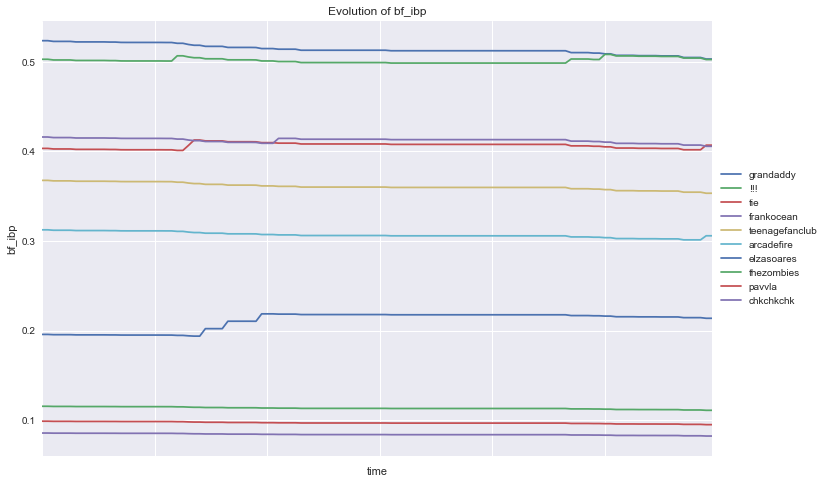

In [66]:
# plot band evolution
bands = top_10 #['arcadefire', '!!!', 'frankocean']
ax = plt.figure(figsize=(12,8)).add_subplot(111)
for b in bands:
    rankings[rankings['bandCodedName'] == b].set_index('createdAt').plot(y='bf_ibp', label=b, ax=ax)
ax.set_title('Evolution of bf_ibp')
ax.set_ylabel('bf_ibp')
ax.set_xlabel('time')
ax.set_xticklabels([])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))